<a href="https://colab.research.google.com/github/YesianaPhan/Iris-data-image-classifier-CNN-/blob/main/iris_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dropout, Dense
from sklearn.preprocessing import  OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow.keras.models as Model
import tensorflow.keras.layers as Layer

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
df = pd.read_csv("/content/gdrive/My Drive/iris_multimodal_dataset/iris_multimodal.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,image
0,5.1,3.5,1.4,0.2,Iris-setosa,00ea5d35aa.jpg
1,4.9,3.0,1.4,0.2,Iris-setosa,09b4632cbf.jpg
2,4.7,3.2,1.3,0.2,Iris-setosa,0ef9fffaf5.jpg
3,4.6,3.1,1.5,0.2,Iris-setosa,15cdc80d57.jpg
4,5.0,3.6,1.4,0.2,Iris-setosa,1a37baefcf.jpg


In [5]:
print(df.shape[0])

150


In [6]:
arr_image = []
for i in tqdm(range(df.shape[0])):
    img = image.load_img("/content/gdrive/My Drive/iris_multimodal_dataset/images/"+df['image'][i],target_size=(200,200,3))
    img = image.img_to_array(img)
    img /= 255
    arr_image.append(img)

X = np.array(arr_image)

100%|██████████| 150/150 [00:55<00:00,  2.68it/s]


In [7]:
X.shape

(150, 200, 200, 3)

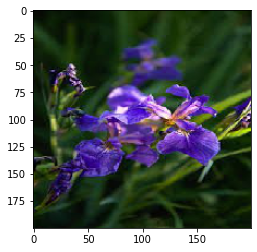

In [8]:
plt.imshow(X[2])

In [9]:
df['species'][2]

'Iris-setosa'

In [10]:
z = np.array(df[["species"]])
z.shape

(150, 1)

In [11]:
onehot = OneHotEncoder(sparse=False)
z = onehot.fit_transform(z)

In [12]:
trainX, testX, trainY, testY = train_test_split(X, z, random_state=20, test_size=0.2)

In [15]:
model = Model.Sequential()
model.add(Layer.Conv2D(36,(6, 6), activation="relu", input_shape=(200,200,3)))
model.add(Layer.MaxPooling2D((2, 2)))
model.add(Layer.Dropout(0.36))
model.add(Layer.Conv2D(32,(6, 6), activation='relu'))
model.add(Layer.MaxPooling2D((2, 2)))
model.add(Layer.Dropout(0.36))
model.add(Layer.Conv2D(64, (6, 6), activation="relu"))
model.add(Layer.MaxPooling2D((2, 2)))
model.add(Layer.Dropout(0.36))
model.add(Layer.Conv2D(64, (6, 6), activation='relu'))
model.add(Layer.MaxPooling2D((2, 2)))
model.add(Layer.Dropout(0.16))
model.add(Layer.Flatten())
model.add(Layer.Dense(128, activation='relu'))
model.add(Layer.Dropout(0.6))
model.add(Layer.Dense(64, activation='relu'))
model.add(Layer.Dropout(0.6))
model.add(Layer.Dense(3, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 195, 195, 36)      3924      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 97, 97, 36)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 97, 97, 36)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 92, 92, 32)        41504     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 46, 46, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 41, 41, 64)       

In [16]:
model.compile(optimizer='adam',metrics=['accuracy'], loss='binary_crossentropy')
model.fit(trainX, trainY, epochs=5, batch_size=64, validation_data=(testX, testY))

Epoch 1/5
2/2 [==============================] - 17s 8s/step - loss: 0.8190 - accuracy: 0.2507 - val_loss: 0.6857 - val_accuracy: 0.2667
Epoch 2/5
2/2 [==============================] - 16s 8s/step - loss: 0.6871 - accuracy: 0.2885 - val_loss: 0.6831 - val_accuracy: 0.3667
Epoch 3/5
2/2 [==============================] - 15s 8s/step - loss: 0.6683 - accuracy: 0.3694 - val_loss: 0.6812 - val_accuracy: 0.2333
Epoch 4/5
2/2 [==============================] - 15s 8s/step - loss: 0.6840 - accuracy: 0.3049 - val_loss: 0.6839 - val_accuracy: 0.2667
Epoch 5/5
2/2 [==============================] - 15s 8s/step - loss: 0.6692 - accuracy: 0.2878 - val_loss: 0.6823 - val_accuracy: 0.2667
